# Predicting Max Temperature and Dry Spell for the Next Month of Each City

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
# Reading the dataframes
adelphi_df = pd.read_csv('adelphi_df').set_index('Date')
ack_df = pd.read_csv('ack_df').set_index('Date')
albany_df = pd.read_csv('albany_df').set_index('Date')
alachua_df = pd.read_csv('alachua_df').set_index('Date')

# Setting index as Date and making it into a datetime object
adelphi_df.index = pd.to_datetime(adelphi_df.index)
ack_df.index = pd.to_datetime(ack_df.index)
albany_df.index = pd.to_datetime(albany_df.index)
alachua_df.index = pd.to_datetime(alachua_df.index)

## Creating function for making predictions

In [34]:
## Setting the model 
reg = Ridge(alpha=.1)
## Identifying our predictors
predictors = ['AVG_Dry_Spell', 'AVG_Frost_Days', 'AVG_Max_High_Temp','AVG_Min_Low_Temp', 'AVG_Precip_Percentile']
## Creating a function for training and prediction
def predict(predictors, df, reg):
    train = df.loc[:'2019-10-01']
    test = df.loc['2019-11-01':]
    reg.fit(train[predictors],  train['Target']) 
    predictions = reg.predict(test[predictors])
    error = print('Error: ', mean_absolute_error(test['Target'], predictions))
    r_square = print('r^2: ', r2_score(test['Target'], predictions))
    combined = pd.concat([test['Target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Prediction']
    return error, r_square, combined

## Max Temperature Prediction in Adelphi

In [74]:
adelphi_df['Target'] = adelphi_df.shift(-1)['AVG_Max_High_Temp']
adelphi_df = adelphi_df.iloc[:-3,:].copy()
adelphi_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.666667,23.333333,58.380462,6.651906,0.008978,64.210977
2006-02-01,0.523810,16.000000,64.210977,12.375184,0.011565,71.779725
2006-03-01,0.619048,12.809524,71.779725,18.881910,0.010393,81.003826
2006-04-01,0.428571,2.619048,81.003826,29.565725,0.019990,88.391318
2006-05-01,0.380952,0.095238,88.391318,39.327334,0.044866,93.546919
...,...,...,...,...,...,...
2022-11-01,0.380952,5.809524,72.442504,25.883503,0.016771,66.392951
2022-12-01,0.476190,16.952381,66.392951,17.665203,0.020295,62.688411
2023-01-01,0.714286,21.761905,62.688411,8.430347,0.011336,64.619907


In [75]:
error, r_square, adelphi_combined = predict(predictors, adelphi_df, reg)

Error:  5.669593189077593
r^2:  0.7696229858182531


Intercepts:  [-12.58346539   0.75896094   2.96800484  -1.47714837  13.01520007]
               Actual  Prediction
Date                             
2019-11-01  66.084295   68.479265
2019-12-01  61.934662   71.151295
2020-01-01  64.173576   70.225233
2020-02-01  69.990751   59.852586
2020-03-01  82.304724   70.467034


<AxesSubplot:xlabel='Date'>

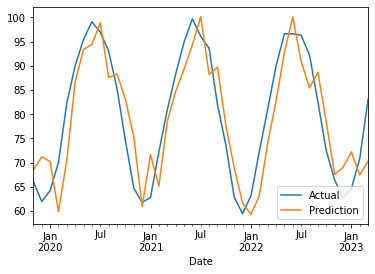

In [40]:
print('Intercepts: ', reg.coef_)
print(adelphi_combined.head())
adelphi_combined.plot()

## Dry Spell Prediction in Adelphi

In [78]:
adelphi_df['Target'] = adelphi_df.shift(-1)['AVG_Dry_Spell']
adelphi_df = adelphi_df.iloc[:-3,:].copy()
adelphi_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.666667,23.333333,58.380462,6.651906,0.008978,0.523810
2006-02-01,0.523810,16.000000,64.210977,12.375184,0.011565,0.619048
2006-03-01,0.619048,12.809524,71.779725,18.881910,0.010393,0.428571
2006-04-01,0.428571,2.619048,81.003826,29.565725,0.019990,0.380952
2006-05-01,0.380952,0.095238,88.391318,39.327334,0.044866,0.095238
...,...,...,...,...,...,...
2022-11-01,0.380952,5.809524,72.442504,25.883503,0.016771,0.476190
2022-12-01,0.476190,16.952381,66.392951,17.665203,0.020295,0.714286
2023-01-01,0.714286,21.761905,62.688411,8.430347,0.011336,0.904762


In [79]:
error, r_square, adelphi_combined = predict(predictors, adelphi_df, reg)

Error:  0.12957297359552353
r^2:  0.36539442384334797


Intercepts:  [ 0.2929304   0.01180836 -0.02757361  0.02599238 -0.37592283]
              Actual  Prediction
Date                            
2019-11-01  0.380952    0.523843
2019-12-01  0.619048    0.573262
2020-01-01  0.952381    0.586119
2020-02-01  0.476190    0.735799
2020-03-01  0.285714    0.534275


<AxesSubplot:xlabel='Date'>

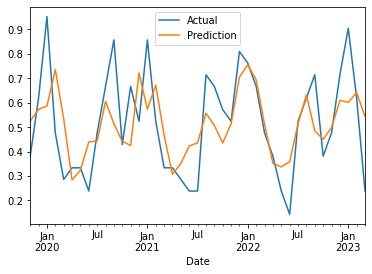

In [50]:
print('Intercepts: ', reg.coef_)
print(adelphi_combined.head())
adelphi_combined.plot()

## Max Temperature Prediction in Akerman

In [84]:
ack_df['Target'] = ack_df.shift(-1)['AVG_Max_High_Temp']
ack_df = ack_df.iloc[:-3,:].copy()
ack_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.761905,15.761905,68.284760,16.643736,0.020218,71.710266
2006-02-01,0.285714,8.619048,71.710266,18.613628,0.035508,77.423640
2006-03-01,0.571429,4.238095,77.423640,25.492232,0.025910,83.610128
2006-04-01,0.714286,0.190476,83.610128,36.425706,0.050267,89.570718
2006-05-01,0.619048,0.000000,89.570718,48.237222,0.068791,94.846018
...,...,...,...,...,...,...
2022-11-01,0.761905,3.142857,79.125849,25.516478,0.020426,72.749863
2022-12-01,0.714286,9.380952,72.749863,20.284564,0.017431,70.633234
2023-01-01,0.619048,13.904762,70.633234,17.770612,0.024915,72.482806


In [85]:
error, r_square, akerman_combined = predict(predictors, ack_df, reg)

Error:  3.3744900450802304
r^2:  0.8420480789867371


Intercepts:  [-10.006617    -0.57799335  -0.19951691   0.51286329  17.09796902]
               Actual  Prediction
Date                             
2019-11-01  72.083374   81.793972
2019-12-01  68.530574   71.908591
2020-01-01  72.942178   72.817190
2020-02-01  77.949948   74.505246
2020-03-01  84.357316   82.837550


<AxesSubplot:xlabel='Date'>

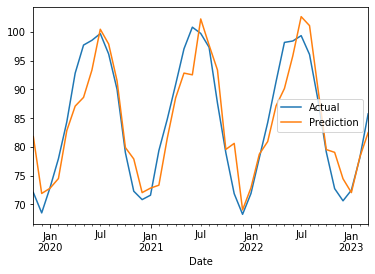

In [38]:
print('Intercepts: ', reg.coef_)
print(akerman_combined.head())
akerman_combined.plot()

## Dry Spell Prediction in Akerman

In [90]:
ack_df['Target'] = ack_df.shift(-1)['AVG_Dry_Spell']
ack_df = ack_df.iloc[:-3,:].copy()
ack_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.761905,15.761905,68.284760,16.643736,0.020218,0.285714
2006-02-01,0.285714,8.619048,71.710266,18.613628,0.035508,0.571429
2006-03-01,0.571429,4.238095,77.423640,25.492232,0.025910,0.714286
2006-04-01,0.714286,0.190476,83.610128,36.425706,0.050267,0.619048
2006-05-01,0.619048,0.000000,89.570718,48.237222,0.068791,0.571429
...,...,...,...,...,...,...
2022-11-01,0.761905,3.142857,79.125849,25.516478,0.020426,0.714286
2022-12-01,0.714286,9.380952,72.749863,20.284564,0.017431,0.619048
2023-01-01,0.619048,13.904762,70.633234,17.770612,0.024915,0.380952


In [91]:
error, r_square, akerman_combined = predict(predictors, ack_df, reg)

Error:  0.16298067719730625
r^2:  0.15282583868240174


Intercepts:  [ 0.13801979  0.01269558  0.0518075  -0.02591311 -0.67765414]
              Actual  Prediction
Date                            
2019-11-01  0.809524    0.604873
2019-12-01  0.476190    0.609363
2020-01-01  0.809524    0.485508
2020-02-01  0.523810    0.571908
2020-03-01  0.619048    0.555410


<AxesSubplot:xlabel='Date'>

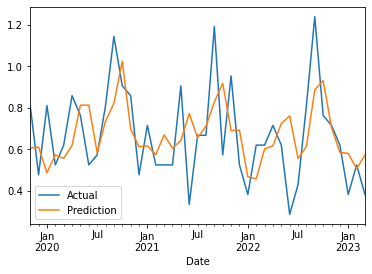

In [53]:
print('Intercepts: ', reg.coef_)
print(akerman_combined.head())
akerman_combined.plot()

## Max Temperature Prediction in Albany

In [93]:
albany_df['Target'] = albany_df.shift(-1)['AVG_Max_High_Temp']
albany_df = albany_df.iloc[:-3,:].copy()
albany_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,1.000000,0.476190,65.503689,36.699087,0.024288,68.575741
2006-02-01,0.380952,0.619048,68.575741,37.137335,0.054996,72.179500
2006-03-01,0.761905,0.000000,72.179500,42.088860,0.016353,74.968146
2006-04-01,1.190476,0.000000,74.968146,43.077417,0.008492,77.666171
2006-05-01,1.714286,0.000000,77.666171,45.992517,0.000690,81.295165
...,...,...,...,...,...,...
2022-11-01,1.047619,0.190476,75.137506,40.119746,0.016749,66.630203
2022-12-01,0.761905,0.333333,66.630203,36.781461,0.049533,66.625767
2023-01-01,0.809524,0.095238,66.625767,38.080262,0.078666,70.169875


In [94]:
error, r_square, albany_combined = predict(predictors, albany_df, reg)

Error:  2.34907173789717
r^2:  0.7896604246732819


Intercepts:  [ 2.17094888 -2.89660225 -0.44698367  1.20548582 -2.84359133]
               Actual  Prediction
Date                             
2019-11-01  66.207057   70.691994
2019-12-01  66.095828   70.487782
2020-01-01  70.635219   69.747272
2020-02-01  73.472303   71.500059
2020-03-01  75.966633   72.217292


<AxesSubplot:xlabel='Date'>

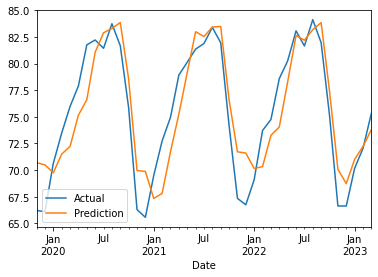

In [43]:
print('Intercepts: ', reg.coef_)
print(albany_combined.head())
albany_combined.plot()

## Dry Spell Prediction in Albany

In [97]:
albany_df['Target'] = albany_df.shift(-1)['AVG_Dry_Spell']
albany_df = albany_df.iloc[:-3,:].copy()
albany_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,1.000000,0.476190,65.503689,36.699087,0.024288,0.380952
2006-02-01,0.380952,0.619048,68.575741,37.137335,0.054996,0.761905
2006-03-01,0.761905,0.000000,72.179500,42.088860,0.016353,1.190476
2006-04-01,1.190476,0.000000,74.968146,43.077417,0.008492,1.714286
2006-05-01,1.714286,0.000000,77.666171,45.992517,0.000690,1.857143
...,...,...,...,...,...,...
2022-11-01,1.047619,0.190476,75.137506,40.119746,0.016749,0.761905
2022-12-01,0.761905,0.333333,66.630203,36.781461,0.049533,0.809524
2023-01-01,0.809524,0.095238,66.625767,38.080262,0.078666,0.857143


In [98]:
error, r_square, albany_combined = predict(predictors, albany_df, reg)

Error:  0.26081583887831583
r^2:  0.29634248555097653


Intercepts:  [ 0.06701811 -0.53269091  0.00418164  0.0154757  -1.18508033]
              Actual  Prediction
Date                            
2019-11-01  0.857143    1.018992
2019-12-01  0.619048    0.952252
2020-01-01  0.619048    0.901269
2020-02-01  1.190476    0.954425
2020-03-01  1.333333    0.986778


<AxesSubplot:xlabel='Date'>

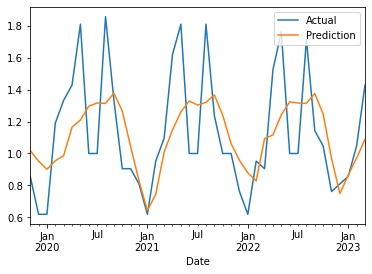

In [56]:
print('Intercepts: ', reg.coef_)
print(albany_combined.head())
albany_combined.plot()

## Max Temperature Prediction in Alachua

In [101]:
alachua_df['Target'] = alachua_df.shift(-1)['AVG_Max_High_Temp']
alachua_df = alachua_df.iloc[:-3,:].copy()
alachua_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.714286,2.714286,78.249658,27.608118,0.025237,81.318539
2006-02-01,0.428571,0.952381,81.318539,32.829384,0.029095,84.662147
2006-03-01,0.952381,0.476190,84.662147,35.377309,0.008301,90.444171
2006-04-01,0.857143,0.000000,90.444171,45.618184,0.016765,95.701762
2006-05-01,0.761905,0.000000,95.701762,55.105053,0.040942,99.066503
...,...,...,...,...,...,...
2022-11-01,0.952381,0.142857,86.245411,39.871050,0.006682,81.418748
2022-12-01,1.095238,1.238095,81.418748,31.882749,0.013194,79.538338
2023-01-01,0.809524,1.285714,79.538338,29.248816,0.020701,81.193504


In [102]:
error, r_square, alachua_combined = predict(predictors, alachua_df, reg)

Error:  2.4953463138094674
r^2:  0.8338583103140245


Intercepts:  [-7.21083261  0.7398655   2.32879957 -0.86349753  6.34174184]
               Actual  Prediction
Date                             
2019-11-01  81.300522   87.848038
2019-12-01  79.120847   80.978759
2020-01-01  81.680683   82.201905
2020-02-01  86.187871   82.862992
2020-03-01  91.563105   89.089198


<AxesSubplot:xlabel='Date'>

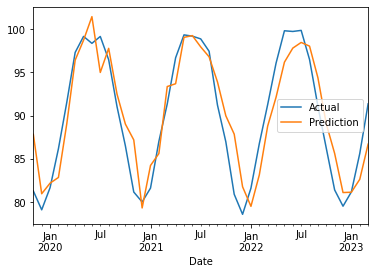

In [46]:
print('Intercepts: ', reg.coef_)
print(alachua_combined.head())
alachua_combined.plot()

## Dry Spell Prediction in Alachua

In [105]:
alachua_df['Target'] = alachua_df.shift(-1)['AVG_Dry_Spell']
alachua_df = alachua_df.iloc[:-3,:].copy()
alachua_df

,AVG_Dry_Spell,AVG_Frost_Days,AVG_Max_High_Temp,AVG_Min_Low_Temp,AVG_Precip_Percentile,Target
Date,,,,,,
2006-01-01,0.714286,2.714286,78.249658,27.608118,0.025237,0.428571
2006-02-01,0.428571,0.952381,81.318539,32.829384,0.029095,0.952381
2006-03-01,0.952381,0.476190,84.662147,35.377309,0.008301,0.857143
2006-04-01,0.857143,0.000000,90.444171,45.618184,0.016765,0.761905
2006-05-01,0.761905,0.000000,95.701762,55.105053,0.040942,0.476190
...,...,...,...,...,...,...
2022-11-01,0.952381,0.142857,86.245411,39.871050,0.006682,1.095238
2022-12-01,1.095238,1.238095,81.418748,31.882749,0.013194,0.809524
2023-01-01,0.809524,1.285714,79.538338,29.248816,0.020701,0.666667


In [106]:
error, r_square, alachua_combined = predict(predictors, alachua_df, reg)

Error:  0.1633040471189546
r^2:  0.5279199539894532


Intercepts:  [ 0.27852156 -0.17375888 -0.0833244   0.03147091 -1.03055418]
              Actual  Prediction
Date                            
2019-11-01  0.714286    0.735044
2019-12-01  0.714286    0.889332
2020-01-01  0.809524    0.654996
2020-02-01  0.809524    0.768663
2020-03-01  0.571429    0.671514


<AxesSubplot:xlabel='Date'>

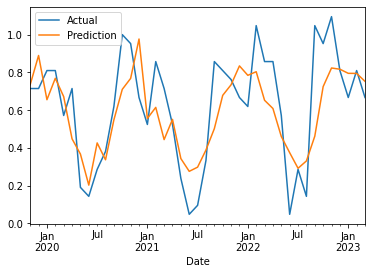

In [59]:
print('Intercepts: ', reg.coef_)
print(alachua_combined.head())
alachua_combined.plot()

# Predictions

In [87]:
#Getting this months data for each city
adelphi_april = adelphi_df.iloc[207:208][predictors]
ack_april = ack_df.iloc[207:208][predictors]
albany_april = albany_df.iloc[207:208][predictors]
alachua_april = alachua_df.iloc[207:208][predictors]

In [76]:
print("Max Temperature for May in Adelphi: ", reg.predict(adelphi_april))

Max Temperature for May in Adelphi:  [89.9920877]


In [83]:
print("AVG Dry Spell for May in Adelphi: ", reg.predict(adelphi_april))

AVG Dry Spell for May in Adelphi:  [0.24367177]


In [88]:
print("Max Temperature for May in Akerman: ", reg.predict(ack_april))

Max Temperature for May in Akerman:  [88.76700714]


In [92]:
print("AVG Dry Spell for May in Akerman: ", reg.predict(ack_april))

AVG Dry Spell for May in Akerman:  [0.6796896]


In [95]:
print("Max Temperature for May in Albany: ", reg.predict(albany_april))

Max Temperature for May in Albany:  [74.45862305]


In [99]:
print("AVG Dry Spell for May in Albany: ", reg.predict(albany_april))

AVG Dry Spell for May in Albany:  [1.15148806]


In [103]:
print("Max Temperature for May in Alachua: ", reg.predict(alachua_april))

Max Temperature for May in Alachua:  [94.36096007]


In [107]:
print("AVG Dry Spell for May in Alachua: ", reg.predict(alachua_april))

AVG Dry Spell for May in Alachua:  [0.51772296]
